## ***12.RANDOM FOREST***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('glass.csv')

#### 1.Exploratory Data Analysis

In [ ]:
df.shape

(999, 10)

In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [ ]:
df.isna().sum()

,0
RI,785
Na,785
Mg,785
Al,785
Si,785
K,785
Ca,785
Ba,785
Fe,785
Type,785


In [ ]:
df.duplicated().sum()

np.int64(785)

In [ ]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [ ]:
df.isna().sum()

,0
RI,1
Na,1
Mg,1
Al,1
Si,1
K,1
Ca,1
Ba,1
Fe,1
Type,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(213, 10)

In [ ]:
df.Type.unique()

array([1., 2., 3., 5., 6., 7.])

In [ ]:
df.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,float64


In [ ]:
from sklearn.preprocessing import LabelEncoder

features=df.drop(columns=['Type'])
target=df[['Type']]

# Encode target variable
le = LabelEncoder()
target['Type'] = le.fit_transform(target['Type'])

####  2]Data Visualisations

<Axes: >

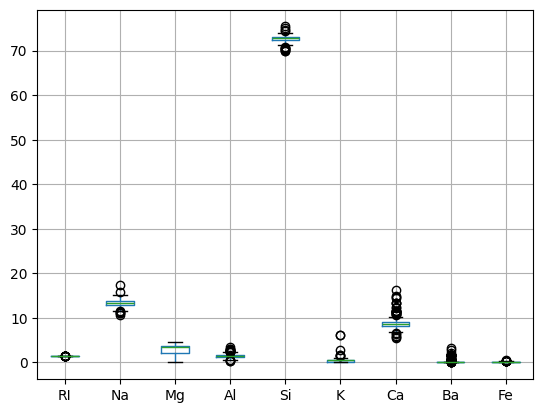

In [ ]:
features.boxplot()
#here we are seeing outliers in features and we observe that almost each column has outlier
#we will treat this outlier


In [ ]:
def outlier_capping(features,column):
 Q1=features[column].quantile(0.25)
 Q3=features[column].quantile(0.75)
 IQR=Q3-Q1
 UE=Q3+1.5*IQR
 LE=Q1-1.5*IQR
 features[column]=features[column].apply(lambda x:UE if x>UE else LE if x<LE else x)
for col in features.select_dtypes(['float']).columns:
 outlier_capping(features,col)

<Axes: >

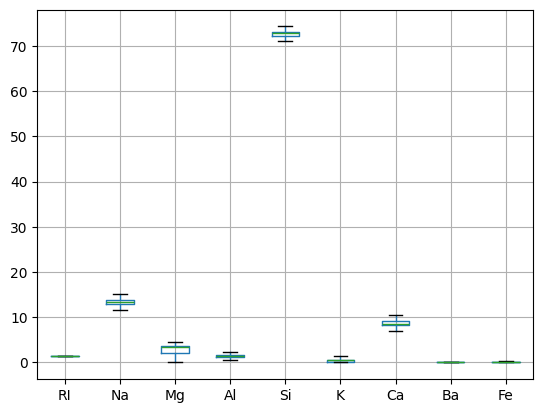

In [ ]:
features.boxplot()

<Axes: >

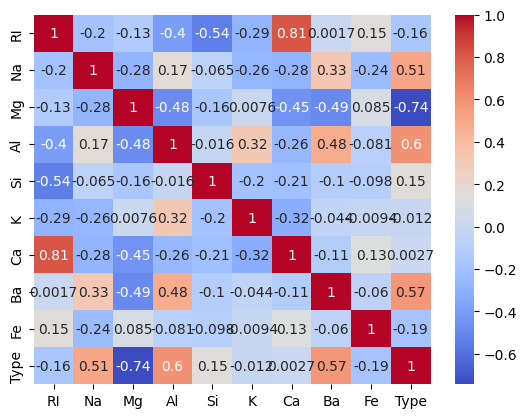

In [ ]:
sns.heatmap(df.corr(method='pearson'),annot=True,cmap='coolwarm')
#here we see that target Type has highest correlation with Na,Al,Ba and highest negative correlation
#with Mg. We also observe that there is multicollinearity b/w features also like Ca and Rl, Ba and Al, etc.
#these features needs to be deleted because Because they overlap too much,
# the model has trouble figuring out which one matters.


<Axes: >

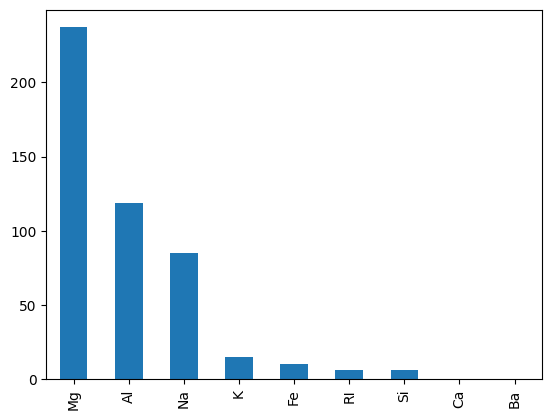

In [ ]:
#feature selection
from sklearn.feature_selection import f_regression
f_reg=f_regression(features,target)
pd.Series(f_reg[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')

In [ ]:
features.drop(columns=['Ba','Ca','RI','Si','Fe','K'],inplace=True)
#dropping few features on the basis above plot

#### 3]Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
features=pd.DataFrame(std.fit_transform(features),columns=features.columns)
#standardising

#### 4] Random Forest Model Implementation

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [ ]:
rand_fore=RandomForestClassifier()
rand_fore.fit(x_train,y_train)
y_pred=rand_fore.predict(x_test)
accuracy_score(y_test,y_pred)

0.7222222222222222

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.75      0.79      0.77        19
           2       0.00      0.00      0.00         4
           3       1.00      0.75      0.86         8
           4       0.50      0.33      0.40         3
           5       0.75      0.75      0.75         8

    accuracy                           0.72        54
   macro avg       0.61      0.59      0.59        54
weighted avg       0.69      0.72      0.70        54



In [ ]:
'''
Precision: For each class, precision tells you, out of all the times the model predicted that class, how often it was correct.
i.e True Positive/ (True Positive + False Positive)

For example, for class 0, when your model predicted a glass was of type 0, it was correct 65% of the time.
For class 3, the precision is 1.00, meaning every time the model predicted type 3, it was always correct.
For class 2, the precision is 0.00, which suggests the model never correctly predicted any instance of class 2, or perhaps never predicted class 2 at all in the test set.

Recall: For each class, recall tells you, out of all the actual instances of that class in the test set, how many the model correctly identified.

For class 0, the recall is 0.92, meaning the model successfully identified 92% of all actual type 0 glasses in the test set.
For class 2, the recall is 0.00, meaning the model failed to identify any of the actual type 2 glasses.

Accuracy: This is the overall accuracy of the model on the test set, which is 0.72 (or 72%). It's the ratio of correctly predicted samples to the total number of sample.

'''


"\nPrecision: For each class, precision tells you, out of all the times the model predicted that class, how often it was correct.\ni.e True Positive/ (True Positive + False Positive)\n\nFor example, for class 0, when your model predicted a glass was of type 0, it was correct 65% of the time.\nFor class 3, the precision is 1.00, meaning every time the model predicted type 3, it was always correct.\nFor class 2, the precision is 0.00, which suggests the model never correctly predicted any instance of class 2, or perhaps never predicted class 2 at all in the test set.\n\nRecall: For each class, recall tells you, out of all the actual instances of that class in the test set, how many the model correctly identified.\n\nFor class 0, the recall is 0.92, meaning the model successfully identified 92% of all actual type 0 glasses in the test set.\nFor class 2, the recall is 0.00, meaning the model failed to identify any of the actual type 2 glasses.\n\nAccuracy: This is the overall accuracy of t

#### 5] Bagging and Boosting Methods

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
bag_class=BaggingClassifier(estimator=LogisticRegression(),n_estimators=100,max_samples=0.9,max_features=1.0, # Corrected typo maax_features to max_features
                            bootstrap=True,bootstrap_features=True)
bag_class.fit(x_train,y_train)
y_pred=bag_class.predict(x_test)
accuracy_score(y_test,y_pred)

0.5185185185185185

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.6,subsample=0.8,
                                      max_depth=4,max_features=1,random_state=100)

In [ ]:
grad_boost.fit(x_train,y_train)
y_pred=grad_boost.predict(x_test)
accuracy_score(y_test,y_pred)

0.7592592592592593

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb=xgb.XGBClassifier(n_estimator=100,learning_rate=0.5,min_child_weight=2,reg_alpha=5,reg_lambda=10,
                      subsample=0.9,max_depth=3,max_features=1,random_state=50)


In [ ]:
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.6296296296296297

In [1]:
'''
INTERVIEW QUESTIONS:

1.
ANSWER:
A]Bagging focuses on reducing a model's variance to prevent overfitting.
How it works: It creates multiple subsets of the original data using bootstrapping (random sampling with replacement). A separate, independent model is trained on each subset simultaneously.
Aggregation: The final prediction is reached by averaging the results (for regression) or by a majority vote (for classification).
Example: Random Forest, which builds multiple independent decision trees in parallel.

B]Boosting focuses on reducing a model's bias to improve accuracy and handle complex patterns.
How it works: Models are trained sequentially rather than in parallel. Each new model focuses specifically on the errors (misclassified points or residuals) made by the previous model.
Weighting: Data points that were difficult for the previous model to predict are given higher weights, forcing the next model to prioritize them.
Examples: AdaBoost, Gradient Boosting, XGBoost, and LightGBM.

2.
ANSWER:
1. Data-Level Methods (Resampling)
These techniques modify the dataset before training to create a more balanced class distribution.

Oversampling: Increases the size of the minority class by duplicating existing samples or creating synthetic ones.

SMOTE (Synthetic Minority Over-sampling Technique): Generates new, artificial samples by interpolating between existing minority class data points instead of just copying them.

ADASYN: An adaptive version of SMOTE that focuses on generating more samples in regions where the minority class is harder to learn.

Undersampling: Reduces the size of the majority class by removing some of its samples.

2. Algorithm-Level Methods
These modify the model's internal learning process to be more sensitive to the minority class without changing the data distribution.

Cost-Sensitive Learning (Class Weighting): Assigns a higher penalty or "cost" to misclassifying the minority class during training.

Threshold Adjustment: Changes the default classification threshold (usually 0.5) to a value that balances precision and recall more effectively for the specific use case.

Anomaly Detection: In cases of extreme imbalance, the minority class can be treated as an outlier using specialized algorithms like Isolation Forest or One-Class SVM.

3. Ensemble Methods

Ensemble learners combine multiple models to improve predictive performance on skewed data.

Balanced Bagging: Trains multiple models on different balanced subsets created through random undersampling of the majority class.

Boosting with Imbalance: Algorithms like XGBoost, LightGBM, and CatBoost have built-in parameters (e.g., scale_pos_weight) specifically designed to penalize minority class errors more heavily.

4. Proper Evaluation Metrics

Standard accuracy is misleading for imbalanced data (e.g., a model can be 99% accurate by simply predicting the majority class 100% of the time). Instead, use:

Precision and Recall: To measure exactness and completeness for the minority class.

F1-Score: The harmonic mean of precision and recall.

ROC-AUC and Precision-Recall (PR) Curves: To evaluate performance across all classification thresholds.
'''

'\nINTERVIEW QUESTIONS:\n\n1.\nANSWER:\nA]Bagging focuses on reducing a model\'s variance to prevent overfitting. \nHow it works: It creates multiple subsets of the original data using bootstrapping (random sampling with replacement). A separate, independent model is trained on each subset simultaneously.\nAggregation: The final prediction is reached by averaging the results (for regression) or by a majority vote (for classification).\nExample: Random Forest, which builds multiple independent decision trees in parallel. \n\nB]Boosting focuses on reducing a model\'s bias to improve accuracy and handle complex patterns. \nHow it works: Models are trained sequentially rather than in parallel. Each new model focuses specifically on the errors (misclassified points or residuals) made by the previous model.\nWeighting: Data points that were difficult for the previous model to predict are given higher weights, forcing the next model to prioritize them.\nExamples: AdaBoost, Gradient Boosting, 